**Data Cleaning:** This involves handling missing values, dealing with outliers, and ensuring consistency in data formats. Missing values can be imputed using various techniques, such as mean/median imputation or using advanced methods like K-nearest neighbors. Outliers may need to be addressed by either removing them or transforming them to fall within a reasonable range.

**Data Integration:** If you have multiple datasets related to car prices, you may need to combine them into a single dataset. This can involve matching and merging records based on common identifiers or performing data joins based on shared attributes.

**Data Transformation:** Sometimes, the existing variables may not be in a suitable format for analysis. In such cases, feature engineering techniques can be applied to create new variables that may have a better relationship with the target variable, such as transforming categorical variables into numerical ones using one-hot encoding or label encoding.

**Feature Scaling:** It is crucial to make sure that the features are on a similar scale to avoid bias in the model. Common techniques for feature scaling include standardization (mean of 0 and standard deviation of 1) or normalization (scaling values between 0 and 1).

**Train-Validation Split:** Before building the predictive model, it is essential to split the dataset into training and validating subsets. Typically, the majority of the data is used for training, while a smaller portion is reserved for evaluating the model’s performance. As I mentioned in past articles, a train-validate-test split might provide more reliable results.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [106]:
# reading csv file after downloading...
df = pd.read_csv('data.csv')
# ... and getting a first overview about the data
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [108]:
# Pandas DataFrame has a field called columns, 
# that contains the name of the columns
# columns is an index, that is a special data structure 
# in Pandas (very similar to series)
print('Before processing: ')
print(df.columns)

# like series it also has the str method for doing string 
# manipulation what we can do now is to apply the same 
# string function to all column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
print('After processing: ')
print(df.columns)

Before processing: 
Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')
After processing: 
Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')


In [115]:
# dtypes returns for all the columns what is the type of this 
# column and here we're interested in "objects"
# In case of csv files "objects" cannot be something 
# different than strings
print('All columns: ')
print(df.dtypes)
print()
print('String columns: ')
df.dtypes[df.dtypes == 'object']

All columns: 
make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

String columns: 


make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [120]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [121]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1  bmw    1_series  2011  premium_unleaded_(required)      300.0   
2  bmw    1_series  2011  premium_unleaded_(required)      300.0   
3  bmw    1_series  2011  premium_unleaded_(required)      230.0   
4  bmw    1_series  2011  premium_unleaded_(required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear_wheel_drive              2.0   
1               6.0            manual  rear_wheel_drive              2.0   
2               6.0            manual  rear_wheel_drive              2.0   
3               6.0            manual  rear_wheel_drive              2.0   
4               6.0            manual  rear_wheel_drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory_tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [122]:
for col in df.columns:
    print('column name: ', col)
    print('unique value count: ', df[col].nunique())
    print('sample: ', df[col].unique()[0:10])
    print()

column name:  make
unique value count:  48
sample:  ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari']

column name:  model
unique value count:  914
sample:  ['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240']

column name:  year
unique value count:  28
sample:  [2011 2012 2013 1992 1993 1994 2017 1991 2016 1990]

column name:  engine_fuel_type
unique value count:  10
sample:  ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel'
 'electric' 'flex-fuel_(premium_unleaded_recommended/e85)' 'natural_gas'
 'flex-fuel_(premium_unleaded_required/e85)'
 'flex-fuel_(unleaded/natural_gas)']

column name:  engine_hp
unique value count:  356
sample:  [335. 300. 230. 320. 172. 160. 130. 158. 240. 248.]

column name:  engine_cylinders
unique value count:  9
sample:  [ 6.  4.  5.  8. 12.  0. nan 10.  3. 16.]

column name:  transmission_type
uni

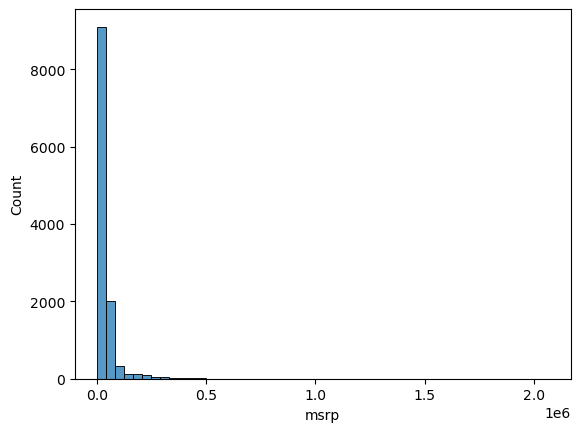

In [126]:
sns.histplot(df.msrp, bins=50)
plt.show()

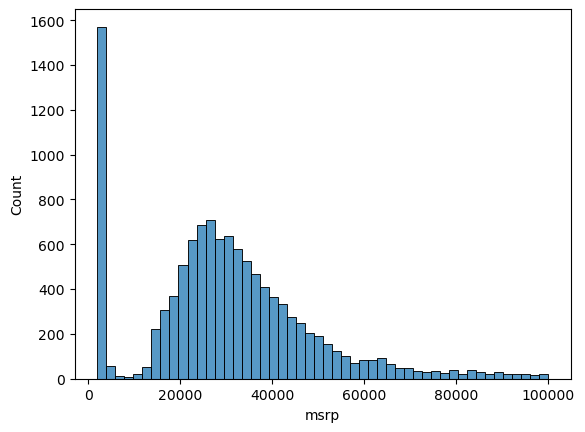

In [127]:
	sns.histplot(df.msrp[df.msrp < 100_000], bins=50)
plt.show()

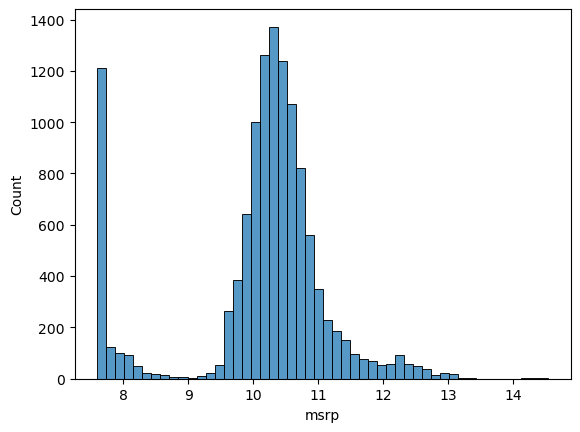

In [128]:
#np.log([0,1,10,1000,100000])
# problem with logarithm is when we have a 0, log(0) does not exist
# np.log([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100000 + 1])
# Output: array([ 0, 0.69314718, 2.39789527, 6.90875478, 11.51293546])

# to not always add 1 there is a NumPy function np.log1p([0,1,10,1000,100000])
# Output: array([ 0, 0.69314718, 2.39789527, 6.90875478, 11.51293546])

price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins=50)
plt.show()

In [129]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [130]:
dataset_total_record_count = len(df)
print('Dataset record count: ', dataset_total_record_count)

n_validation = int(dataset_total_record_count * 0.2)
n_test = int(dataset_total_record_count * 0.2)
n_train = dataset_total_record_count - n_validation - n_test

print('n_validation: ', n_val)
print('n_test: ', n_test)
print('n_train: ', n_train)

print('total: ', n_validation + n_test + n_train)

Dataset record count:  11914
n_validation:  2382
n_test:  2382
n_train:  7150
total:  11914


In [131]:
df

make       model  year                engine_fuel_type  engine_hp  \
0          bmw  1_series_m  2011     premium_unleaded_(required)      335.0   
1          bmw    1_series  2011     premium_unleaded_(required)      300.0   
2          bmw    1_series  2011     premium_unleaded_(required)      300.0   
3          bmw    1_series  2011     premium_unleaded_(required)      230.0   
4          bmw    1_series  2011     premium_unleaded_(required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    acura         zdx  2012     premium_unleaded_(required)      300.0   
11910    acura         zdx  2012     premium_unleaded_(required)      300.0   
11911    acura         zdx  2012     premium_unleaded_(required)      300.0   
11912    acura         zdx  2013  premium_unleaded_(recommended)      300.0   
11913  lincoln      zephyr  2006                regular_unleaded      221.0   

       engine_cylinders transmission_type      driven_wheels  number_of_doors  \
0                   6.0            manual   rear_wheel_drive              2.0   
1                   6.0            manual   rear_wheel_drive              2.0   
2                   6.0            manual   rear_wheel_drive              2.0   
3                   6.0            manual   rear_wheel_drive              2.0   
4                   6.0            manual   rear_wheel_drive              2.0   
...                 ...               ...                ...              ...   
11909               6.0         automatic    all_wheel_drive              4.0   
11910               6.0         automatic    all_wheel_drive              4.0   
11911               6.0         automatic    all_wheel_drive              4.0   
11912               6.0         automatic    all_wheel_drive              4.0   
11913               6.0         automatic  front_wheel_drive              4.0   

                             market_category vehicle_size  vehicle_style  \
0      factory_tuner,luxury,high-performance      compact          coupe   
1                         luxury,performance      compact    convertible   
2                    luxury,high-performance      compact          coupe   
3                         luxury,performance      compact          coupe   
4                                     luxury      compact    convertible   
...                                      ...          ...            ...   
11909             crossover,hatchback,luxury      midsize  4dr_hatchback   
11910             crossover,hatchback,luxury      midsize  4dr_hatchback   
11911             crossover,hatchback,luxury      midsize  4dr_hatchback   
11912             crossover,hatchback,luxury      midsize  4dr_hatchback   
11913                                 luxury      midsize          sedan   

       highway_mpg  city_mpg  popularity   msrp  
0               26        19        3916  46135  
1               28        19        3916  40650  
2               28        20        3916  36350  
3               28        18        3916  29450  
4               28        18        3916  34500  
...            ...       ...         ...    ...  
11909           23        16         204  46120  
11910           23        16         204  56670  
11911           23        16         204  50620  
11912           23        16         204  50920  
11913           26        17          61  28995  

[11914 rows x 16 columns]

In [132]:
df_shuffled = df.sample(frac=1).reset_index(drop=True)

In [133]:
df_shuffled

make                  model  year  \
0      mercedes-benz                c-class  2015   
1                kia                  rondo  2009   
2         volkswagen                     cc  2015   
3                bmw  5_series_gran_turismo  2015   
4          chevrolet         impala_limited  2015   
...              ...                    ...   ...   
11909         toyota                 tacoma  2017   
11910          mazda                   cx-5  2014   
11911      chevrolet                  cruze  2017   
11912          volvo      v60_cross_country  2017   
11913    lamborghini               gallardo  2013   

                     engine_fuel_type  engine_hp  engine_cylinders  \
0         premium_unleaded_(required)      201.0               4.0   
1                    regular_unleaded      175.0               4.0   
2      premium_unleaded_(recommended)      200.0               4.0   
3         premium_unleaded_(required)      445.0               8.0   
4            flex-fuel_(unleaded/e85)      300.0               6.0   
...                               ...        ...               ...   
11909                regular_unleaded      278.0               6.0   
11910                regular_unleaded      184.0               4.0   
11911                regular_unleaded      153.0               4.0   
11912                regular_unleaded      240.0               4.0   
11913     premium_unleaded_(required)      550.0              10.0   

      transmission_type      driven_wheels  number_of_doors  \
0             automatic   rear_wheel_drive              2.0   
1             automatic  front_wheel_drive              4.0   
2      automated_manual  front_wheel_drive              4.0   
3             automatic    all_wheel_drive              4.0   
4             automatic  front_wheel_drive              4.0   
...                 ...                ...              ...   
11909            manual   four_wheel_drive              4.0   
11910         automatic    all_wheel_drive              4.0   
11911            manual  front_wheel_drive              4.0   
11912         automatic    all_wheel_drive              4.0   
11913            manual   rear_wheel_drive              2.0   

                    market_category vehicle_size    vehicle_style  \
0                            luxury      compact            coupe   
1                               NaN      compact            wagon   
2                       performance      midsize            sedan   
3      hatchback,luxury,performance        large    4dr_hatchback   
4                         flex_fuel        large            sedan   
...                             ...          ...              ...   
11909                           NaN      compact  crew_cab_pickup   
11910                     crossover      midsize          4dr_suv   
11911                           NaN      midsize            sedan   
11912              crossover,luxury      midsize            wagon   
11913       exotic,high-performance      compact      convertible   

       highway_mpg  city_mpg  popularity    msrp  
0               31        22         617   39400  
1               27        20        1720   17495  
2               31        22         873   34095  
3               24        16        3916   71400  
4               30        18        1385   26840  
...            ...       ...         ...     ...  
11909           20        17        2031   33075  
11910           30        24         586   26065  
11911           39        28        1385   18525  
11912           30        22         870   41700  
11913           20        12        1158  209500  

[11914 rows x 16 columns]

In [134]:
df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train+n_validation]
df_test = df_shuffled.iloc[n_train+n_validation:]

In [135]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [136]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [141]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [142]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [143]:
del df_train['msrp']
del df_val['msrp'] 
del df_test['msrp']

In [145]:
df_train.iloc[10]

make                                              infiniti
model                                            q60_coupe
year                                                  2014
engine_fuel_type               premium_unleaded_(required)
engine_hp                                            348.0
engine_cylinders                                       6.0
transmission_type                                automatic
driven_wheels                             rear_wheel_drive
number_of_doors                                        2.0
market_category      factory_tuner,luxury,high-performance
vehicle_size                                       midsize
vehicle_style                                        coupe
highway_mpg                                             27
city_mpg                                                19
popularity                                             190
Name: 10, dtype: object

In [155]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
    return res

In [157]:
xi = [348, 19, 190]
w0 = 7.17
w = [0.01, 0.04, 0.002]
 
# adding w0 to the vector w
w_new = [w0] + w
w_new
# Output: [7.17, 0.01, 0.04, 0.002]

def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

linear_regression(xi)

11.790000000000001

In [158]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

X = np.array(
    [
        [1, 148, 24, 1385],
        [1, 132, 25, 2031],
        [1, 453, 11, 86]
    ]
)

y = X.dot(w_new)
np.expm1(y) 

array([237992.82334859, 768348.51018973, 222347.22211011])

In [159]:
def linear_regression(X):
    return X.dot(w_new)
 
y = linear_regression(X)
np.expm1(y) 
# Output: array([237992.82334859, 768348.51018973, 222347.22211011])


array([237992.82334859, 768348.51018973, 222347.22211011])

w = (X^TX)^⁻1X^Ty

In [178]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [179]:
X = np.array(
    [
        [148, 24, 1385],
        [132, 25, 2031],
        [453, 11, 86],
        [158, 24, 185],
        [172, 25, 201],
        [413, 11, 83],
        [38, 54, 185],
        [142, 25, 431],
        [453, 31, 86],  
    ]
)
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

train_linear_regression(X, y)

(30009.252922766642, array([ -22.78396914, -257.69087426,   -2.30322797]))

In [180]:
df_train.dtypes 

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [181]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_train[base].head()

engine_hp  engine_cylinders  highway_mpg  city_mpg  popularity
0      201.0               4.0           31        22         617
1      175.0               4.0           27        20        1720
2      200.0               4.0           31        22         873
3      445.0               8.0           24        16        3916
4      300.0               6.0           30        18        1385

In [183]:
X_train = df_train[base].values
X_train

array([[ 201.,    4.,   31.,   22.,  617.],
       [ 175.,    4.,   27.,   20., 1720.],
       [ 200.,    4.,   31.,   22.,  873.],
       ...,
       [ 240.,    6.,   28.,   19., 3105.],
       [ 170.,    4.,   37.,   25.,  873.],
       [ 295.,    8.,   19.,   14.,  549.]])

In [184]:
df_train[base].isnull().sum()

engine_hp           47
engine_cylinders    16
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [186]:
X_train = df_train[base].fillna(0).values
X_train

array([[ 201.,    4.,   31.,   22.,  617.],
       [ 175.,    4.,   27.,   20., 1720.],
       [ 200.,    4.,   31.,   22.,  873.],
       ...,
       [ 240.,    6.,   28.,   19., 3105.],
       [ 170.,    4.,   37.,   25.,  873.],
       [ 295.,    8.,   19.,   14.,  549.]])

In [187]:
y_train

array([10.58154648,  9.76972756, 10.43693535, ..., 11.00044848,
        9.94731303, 10.39485509])

In [188]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(7.427810168059519,
 array([ 9.38666380e-03, -1.15330674e-01,  4.38496244e-02, -7.16463337e-03,
        -9.86983572e-06]))

In [189]:
y_pred = w0 + X_train.dot(w)
y_pred

array([10.04883363,  9.63282471, 10.03692029, ..., 10.04964105,
        9.99692422, 10.00165006])

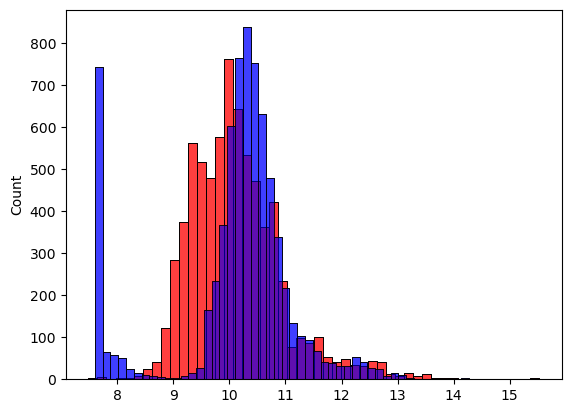

In [191]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
plt.show()

In [196]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [226]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
def prepare_X(df):
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
         
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [227]:
# Training part:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation part:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# Evaluation part:
rmse(y_val, y_pred)

0.5195295417661637

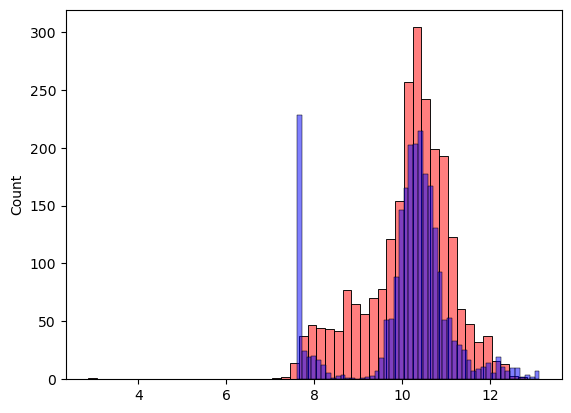

In [228]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)
plt.show()

In [229]:
def train_linear_regression_reg(X, y, r= 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [236]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

0.5195134295420243

In [237]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
 
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
 
    score = rmse(y_val, y_pred)
     
    print("reg parameter: ",r, "bias term: ",w0, "rmse: ",score)

reg parameter:  0.0 bias term:  11.059476869913887 rmse:  0.5195295417661637
reg parameter:  1e-05 bias term:  11.059432823869603 rmse:  0.5195293803787673
reg parameter:  0.0001 bias term:  11.059036450238578 rmse:  0.51952792809586
reg parameter:  0.001 bias term:  11.055076828054565 rmse:  0.5195134295420243
reg parameter:  0.01 bias term:  11.015887713998898 rmse:  0.5193708349071109
reg parameter:  0.1 bias term:  10.660791087634605 rmse:  0.5181506588044463
reg parameter:  1 bias term:  8.893221538970764 rmse:  0.513305150189029
reg parameter:  10 bias term:  6.726959394916979 rmse:  0.5147910598509672


In [238]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
score = rmse(y_val, y_pred)
    
print("rmse: ",score)

rmse:  0.5195134295420243


In [240]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)
y_full_train = np.concatenate([y_train, y_val])

In [241]:
X_full_train = prepare_X(df_full_train) 
X_full_train

array([[201.,   4.,  31., ...,   0.,   0.,   0.],
       [175.,   4.,  27., ...,   0.,   0.,   0.],
       [200.,   4.,  31., ...,   1.,   0.,   0.],
       ...,
       [278.,   6.,  28., ...,   0.,   0.,   0.],
       [130.,   4.,  30., ...,   0.,   0.,   0.],
       [385.,   8.,  22., ...,   0.,   0.,   0.]])

In [242]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
w0, w

(10.726775204086081,
 array([ 3.38115398e-03,  9.75425149e-02, -8.10834261e-03,  1.38346966e-02,
        -3.26461881e-05, -9.52024935e-02, -1.28576106e+00, -1.50686954e+00,
        -1.32517616e+00, -2.02444580e-01, -5.95786600e-02,  1.74117720e-02,
        -2.91401491e-01, -2.42648920e-01]))

In [243]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
 
score = rmse(y_test, y_pred)
    
print("rmse: ",score)

rmse:  0.5075464624067539


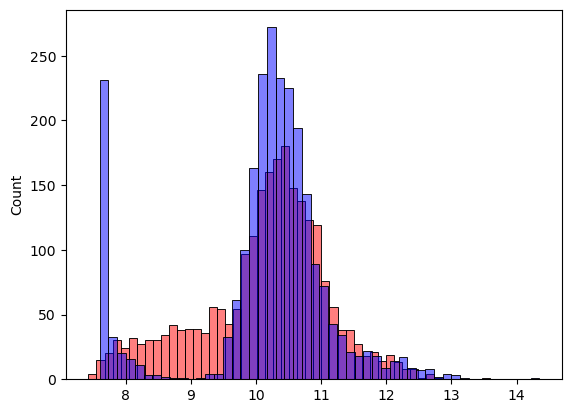

In [244]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_test, color='blue', alpha=0.5, bins=50)
plt.show()

In [246]:
car = df_test.iloc[20].to_dict()
car

{'make': 'mazda',
 'model': 'truck',
 'year': 2003,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 135.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'manual',
 'driven_wheels': 'rear_wheel_drive',
 'number_of_doors': 2.0,
 'market_category': nan,
 'vehicle_size': 'compact',
 'vehicle_style': 'regular_cab_pickup',
 'highway_mpg': 26,
 'city_mpg': 21,
 'popularity': 586}

In [247]:
df_small = pd.DataFrame([car])
df_small

make  model  year  engine_fuel_type  engine_hp  engine_cylinders  \
0  mazda  truck  2003  regular_unleaded      135.0               4.0   

  transmission_type     driven_wheels  number_of_doors  market_category  \
0            manual  rear_wheel_drive              2.0              NaN   

  vehicle_size       vehicle_style  highway_mpg  city_mpg  popularity  
0      compact  regular_cab_pickup           26        21         586

In [249]:
X_small = prepare_X(df_small)
X_small

array([[135.,   4.,  26.,  21., 586.,  14.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.]])

In [254]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
print(y_pred)
np.expm1(y_pred)

9.015386140020414


8227.723184508583

In [255]:
np.expm1(y_test[20])

13929.99999999999